# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

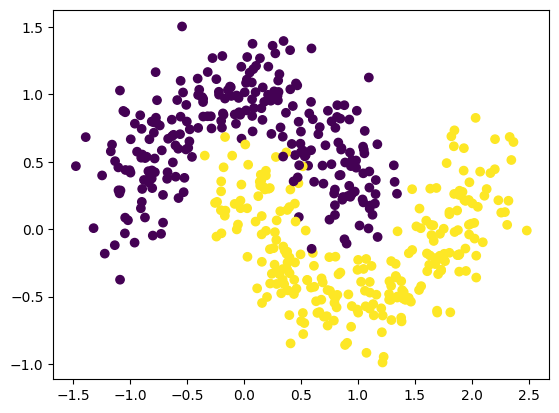

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from mlxtend.plotting import plot_decision_regions

random_state = 100
lr = LogisticRegression(random_state=random_state, n_jobs=-1) # add some params
svm = SVC(kernel="linear", random_state=random_state) # here too

### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.2, random_state=random_state)

lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [5]:
def create_meshgrid(X, step=0.02):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, step),
        np.arange(x2_min, x2_max, step),
    )
    return xx1, xx2


def plot_decision_boundary(xx1, xx2, Z, cmap):
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


def plot_data_points(X, y, colors, markers):
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0], 
            y=X[y == cl, 1],
            c=colors[idx],
            marker=markers[idx], 
            label="Class " + str(cl), 
            edgecolor='black',
        )


def plot_decision_region(X, y, classifier, title, accuracy, pred_type="test", poly_features=None):
    markers = ("x", "+", "o", "^")
    colors = ("green", "purple", "blue", "grey")
    cmap = plt.cm.Accent
    
    xx1, xx2 = create_meshgrid(X)
    grid_points = np.array([xx1.ravel(), xx2.ravel()]).T
    
    if poly_features:
        grid_points = poly_features.transform(grid_points)

    Z = classifier.predict(grid_points)
    Z = Z.reshape(xx1.shape)
    
    plot_decision_boundary(xx1, xx2, Z, cmap)
    plot_data_points(X, y, colors, markers)
    
    plt.legend()
    plt.title(f"{title}\n{pred_type} accuracy: {accuracy}", y=-0.01)
    plt.show()

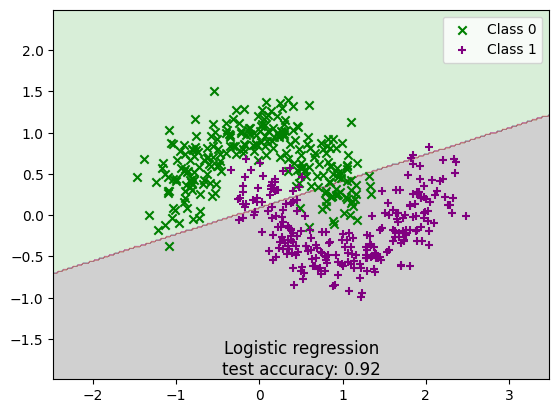

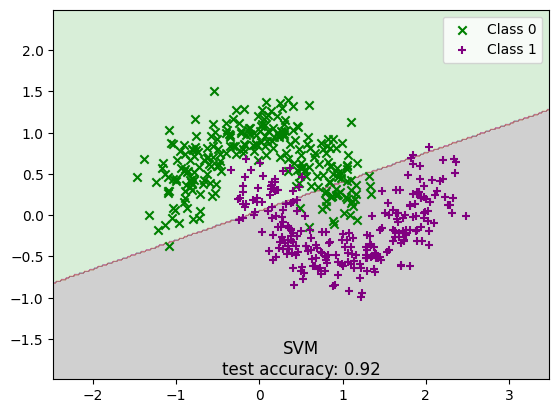

In [6]:
plot_decision_region(moons_points, moons_labels, classifier=lr, title="Logistic regression", accuracy=lr_accuracy)
plot_decision_region(moons_points, moons_labels, classifier=svm, title="SVM", accuracy=svm_accuracy)

С дефолтными параметрами результат на SVM с линейным ядром и LR идентичны.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

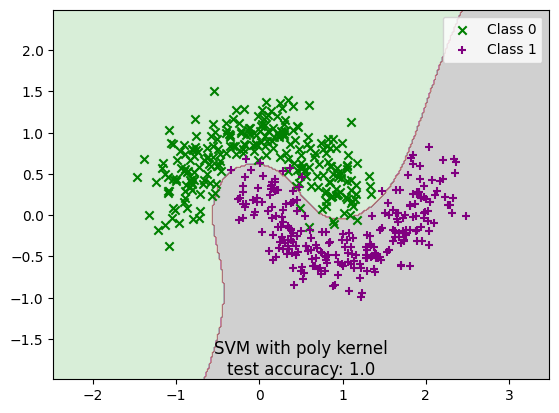

In [7]:
### YOUR CODE HERE
svm_poly = SVC(kernel="poly", random_state=random_state, degree=3, coef0=0.2)  # best min params which give us accuracy=1.0
svm_poly.fit(X_train, y_train)
svm_poly_predictions = svm_poly.predict(X_test)
svm_poly_accuracy = accuracy_score(y_test, svm_poly_predictions)

plot_decision_region(moons_points, moons_labels, classifier=svm_poly, title="SVM with poly kernel", accuracy=svm_poly_accuracy)

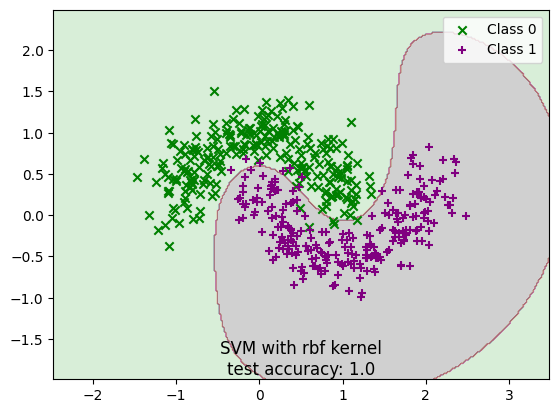

In [8]:
svm_rbf = SVC(kernel="rbf", random_state=random_state, gamma=1)  # best min params which give accuracy=1.0
svm_rbf.fit(X_train, y_train)
svm_rbf_predictions = svm_rbf.predict(X_test)
svm_rbf_accuracy = accuracy_score(y_test, svm_rbf_predictions)

plot_decision_region(moons_points, moons_labels, classifier=svm_rbf, title="SVM with rbf kernel", accuracy=svm_rbf_accuracy)

In [9]:
from sklearn.model_selection import GridSearchCV

params_search_grid = {
    "coef0": np.arange(0.0, 100.0, 1),
    "C": np.arange(0.0, 20.0, 1),
}

svm_sigmoid = SVC(kernel="sigmoid", random_state=random_state)  # didn't manage to find best params with brute force, use grid search

grid_search_svm_sigmoid = GridSearchCV(svm_sigmoid, params_search_grid, scoring="accuracy", cv=5)
grid_search_svm_sigmoid.fit(X_train, y_train)

best_found_svm_sigmoid_params = grid_search_svm_sigmoid.best_params_
print("Best params for svm_sigmoid:", best_found_svm_sigmoid_params)

Best params for svm_sigmoid: {'C': 19.0, 'coef0': 18.0}


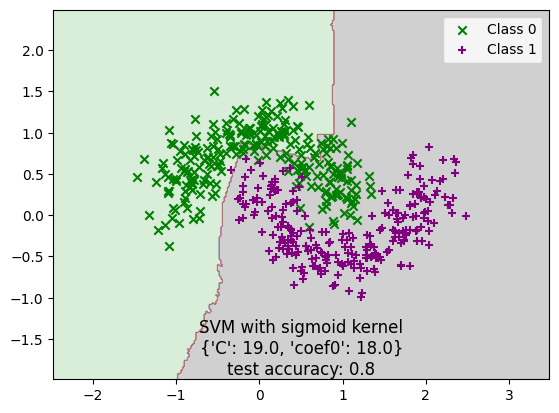

In [10]:
svm_sigmoid_best = SVC(kernel="sigmoid", random_state=random_state, **best_found_svm_sigmoid_params)
svm_sigmoid_best.fit(X_train, y_train)
svm_sigmoid_best_predictions = svm_sigmoid_best.predict(X_test)
svm_sigmoid_best_accuracy = accuracy_score(y_test, svm_sigmoid_best_predictions)

plot_decision_region(
    moons_points,
    moons_labels,
    classifier=svm_sigmoid_best,
    title=f"SVM with sigmoid kernel\n{best_found_svm_sigmoid_params}",
    accuracy=svm_sigmoid_best_accuracy,
)

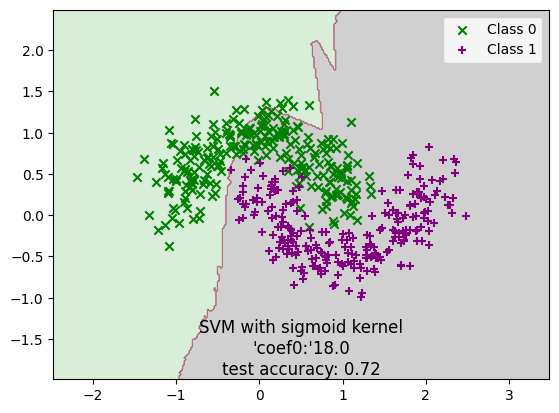

In [11]:
svm_sigmoid_best_only_coef0 = SVC(kernel="sigmoid", random_state=random_state, coef0=best_found_svm_sigmoid_params["coef0"])
svm_sigmoid_best_only_coef0.fit(X_train, y_train)
svm_sigmoid_best_only_coef0_predictions = svm_sigmoid_best_only_coef0.predict(X_test)
svm_sigmoid_best_only_coef0_accuracy = accuracy_score(y_test, svm_sigmoid_best_only_coef0_predictions)

plot_decision_region(
    moons_points,
    moons_labels,
    classifier=svm_sigmoid_best_only_coef0,
    title=f"SVM with sigmoid kernel\n'coef0:'{best_found_svm_sigmoid_params['coef0']}",
    accuracy=svm_sigmoid_best_only_coef0_accuracy,
)

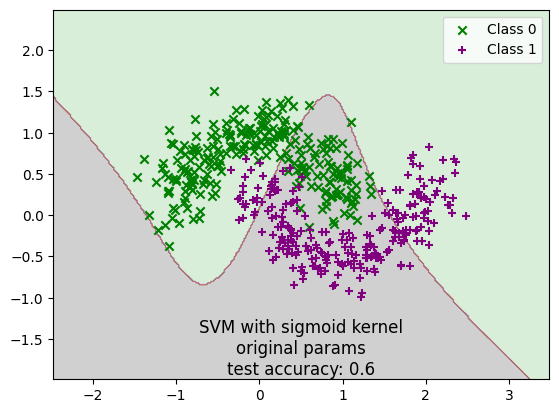

In [12]:
svm_sigmoid_origin = SVC(kernel="sigmoid", random_state=random_state)
svm_sigmoid_origin.fit(X_train, y_train)
svm_sigmoid_origin_predictions = svm_sigmoid_origin.predict(X_test)
svm_sigmoid_origin_accuracy = accuracy_score(y_test, svm_sigmoid_origin_predictions)

plot_decision_region(
    moons_points,
    moons_labels,
    classifier=svm_sigmoid_origin,
    title="SVM with sigmoid kernel\noriginal params",
    accuracy=svm_sigmoid_origin_accuracy,
)

С изменением вида ядра в SVM изменяется и форма разграничивающей линии. Вместе с этим повышается качество классификации на тесте.

1. При полиномиальном ядре хватает уже 3-й степени полинома, чтобы повторить форму границы между классами. Точность на тестовой выборке достигает `1`.
2. При ядре `rbf` точность `1` достигается уже при `gamma = 1`.
3. С ядром вида сигмоида не получилось достичь таких же результатов как и ручным перебором параметров (`koef0`), так и с помощью `GridSearchCV`. Максимальная точность тестовой выборки, которую удалось получить - `0.81` с параметрами `{'C': 55.0, 'coef0': 18.0}`. Возможно, данный вид ядра не очень подходит для данной задачи.


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

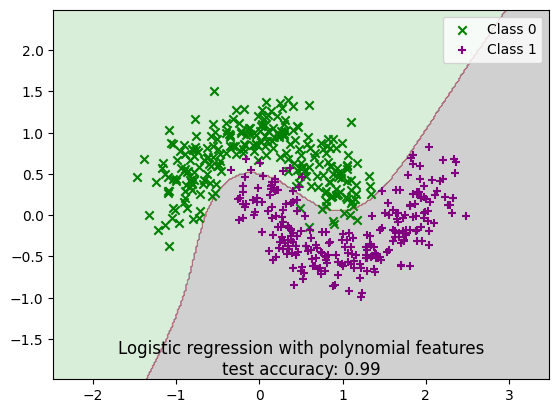

In [13]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
poly_degree = 3

def predict_lr_with_poly_features(poly_degree, X, y, random_state=100):
    poly_features = PolynomialFeatures(degree = poly_degree, include_bias=False)
    lr_poly = LogisticRegression(random_state=random_state)

    X_poly = poly_features.fit_transform(X)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=random_state)

    lr_poly.fit(X_train_poly, y_train_poly)
    lr_poly_predictions = lr_poly.predict(X_test_poly)
    lr_poly_test_accuracy = accuracy_score(y_test_poly, lr_poly_predictions)

    return poly_features, lr_poly, lr_poly_test_accuracy

poly_features, lr_poly, lr_poly_test_accuracy = predict_lr_with_poly_features(poly_degree, moons_points, moons_labels, random_state=random_state)

plot_decision_region(
    moons_points,
    moons_labels, 
    classifier=lr_poly, 
    title='Logistic regression with polynomial features', 
    accuracy=lr_poly_test_accuracy, 
    poly_features=poly_features,
)

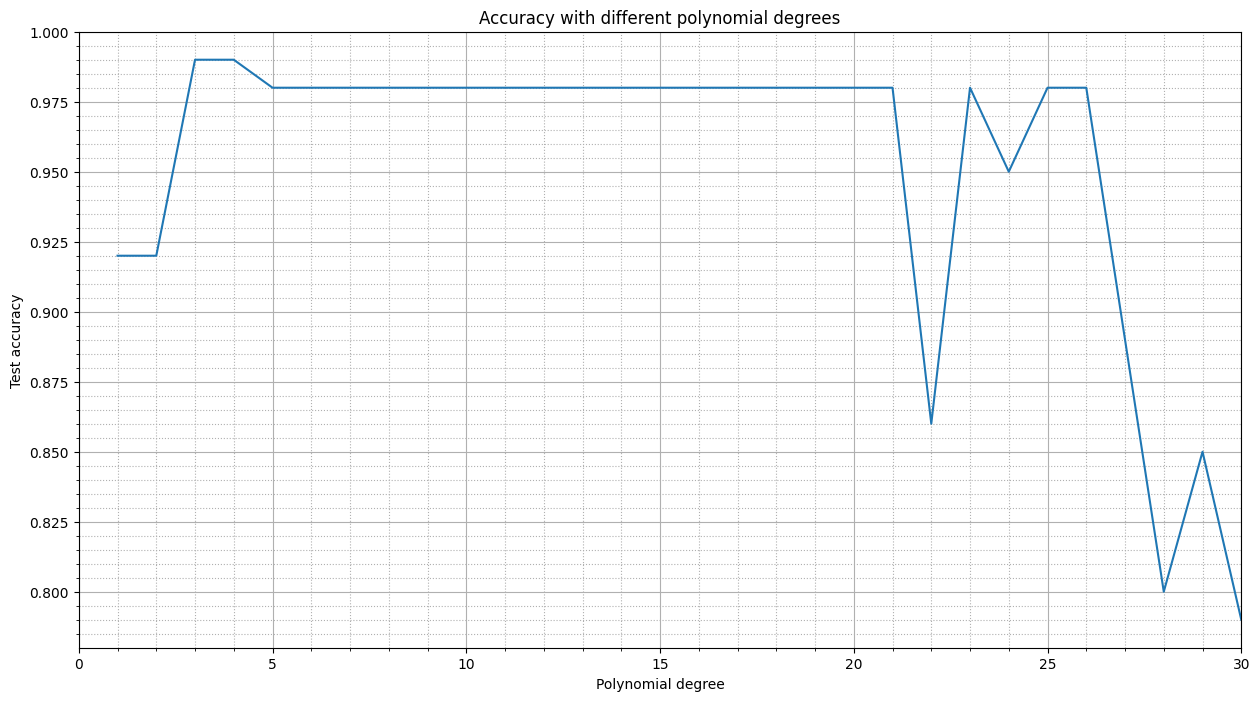

In [14]:
accuracies = []
poly_degrees = []

for degree in range(1, 31):
    poly_features, lr_poly, lr_poly_test_accuracy = predict_lr_with_poly_features(degree, moons_points, moons_labels, random_state=random_state)
    accuracies.append(lr_poly_test_accuracy)
    poly_degrees.append(degree)

def plot_accuracies_with_poly_degrees(poly_degrees, accuracies):
    plt.figure(figsize=(15, 8))
    plt.plot(poly_degrees, accuracies)
    plt.ylabel("Test accuracy")
    plt.xlim (0, 30)
    plt.xlabel("Polynomial degree")
    plt.title("Accuracy with different polynomial degrees")
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linestyle=':')
    plt.show()

plot_accuracies_with_poly_degrees(poly_degrees, accuracies)

Как видно из графика, наибольшей точности LR достигает при степенях полинома `3` и `4`. Результат классификации сопоставим с точностью SVM на полиномиальном и `rbf` ядрах. Начиная со степени полинома `5` точность немного уменьшилась, но все еще держится на приличном уровне. Это связано с тем, что чем больше степерь полинома, тем точнее мы можем огибать точки класса разделяющей плоскостью. Однако та же самая причина ухудшает точность начиная со степени полинома `22` - т.к. проиходит переобучение на тренировочной выборке (разделяющая плоскость становится слишком сложной и на тестовой выборке уже не может адекватно разделять классы).

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

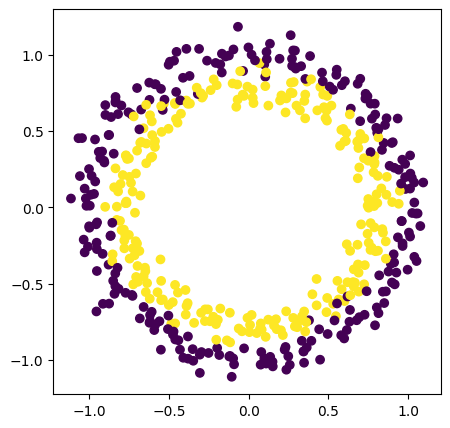

In [15]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

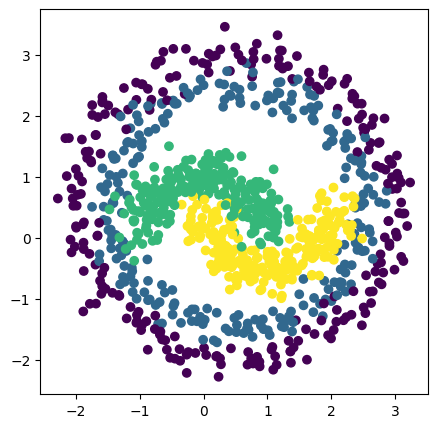

In [16]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

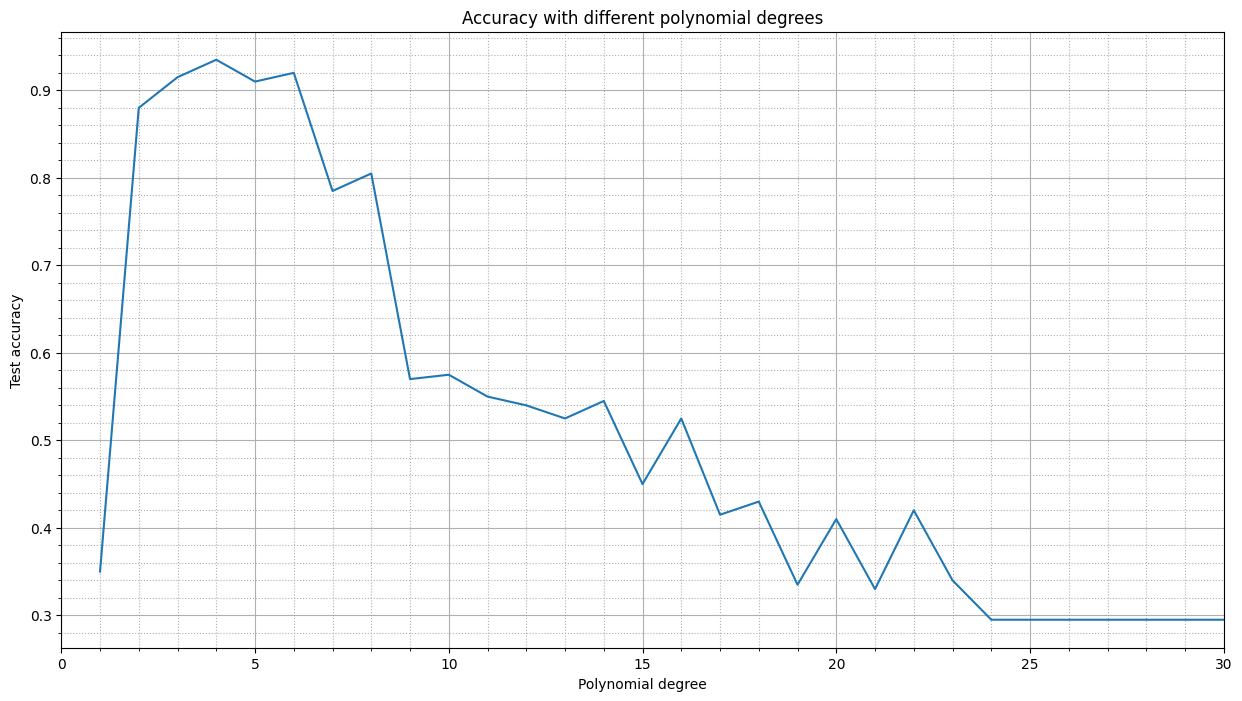

In [17]:
### YOUR CODE HERE
# Logistic Regression with polynomial features
accuracies_hard = []
poly_degrees_hard = []

for degree in range(1, 31):
    poly_features, lr_poly, lr_poly_test_accuracy = predict_lr_with_poly_features(degree, points, labels, random_state=random_state)
    accuracies_hard.append(lr_poly_test_accuracy)
    poly_degrees_hard.append(degree)

plot_accuracies_with_poly_degrees(poly_degrees_hard, accuracies_hard)

Лучший результат по точности у логистической регрессии - полином степени 4.

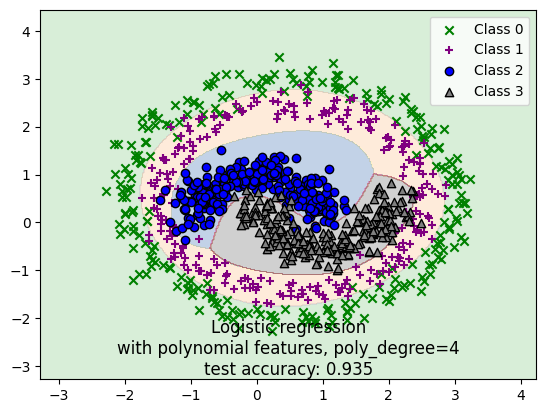

In [18]:
poly_degree_hard_best = 4
poly_features_hard_best, lr_poly_hard_best, lr_poly_test_accuracy_hard_best = predict_lr_with_poly_features(
    poly_degree_hard_best, points, labels, random_state=random_state
)

plot_decision_region(
    points,
    labels, 
    classifier=lr_poly_hard_best, 
    title='Logistic regression\nwith polynomial features, poly_degree=4', 
    accuracy=lr_poly_test_accuracy_hard_best, 
    poly_features=poly_features_hard_best,
)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=random_state)

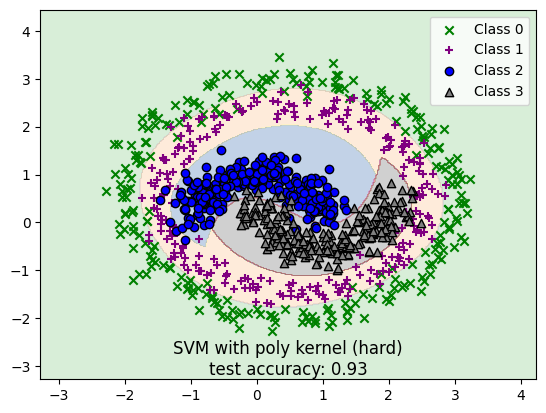

In [20]:
svm_poly_hard = SVC(kernel="poly", random_state=random_state, degree=4, coef0=1.5)  # best params
svm_poly_hard.fit(X_train, y_train)
svm_poly_hard_predictions = svm_poly_hard.predict(X_test)
svm_poly_hard_accuracy = accuracy_score(y_test, svm_poly_hard_predictions)

plot_decision_region(points, labels, classifier=svm_poly_hard, title="SVM with poly kernel (hard)", accuracy=svm_poly_hard_accuracy)

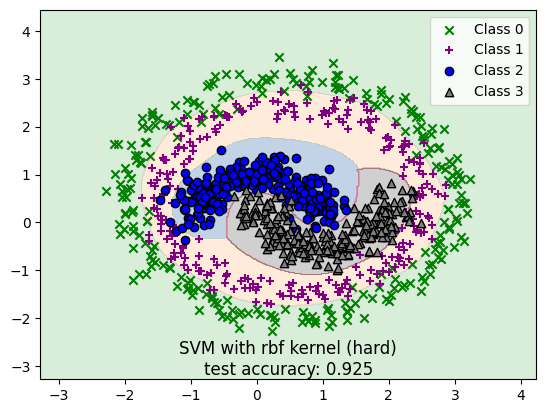

In [21]:
svm_rbf_hard = SVC(kernel="rbf", random_state=random_state, gamma=2)  # best params
svm_rbf_hard.fit(X_train, y_train)
svm_rbf_hard_predictions = svm_rbf_hard.predict(X_test)
svm_rbf_hard_accuracy = accuracy_score(y_test, svm_rbf_hard_predictions)

plot_decision_region(points, labels, classifier=svm_rbf_hard, title="SVM with rbf kernel (hard)", accuracy=svm_rbf_hard_accuracy)

На более сложном датасете (4 класса вместо 2-х) все модели справились немного хуже, чем на двухклассовой. Наилучшим образом показакала себя модель логистической регресии с полиномиальными фичами (при заданном random_state=100). Модели SVM (с poly и rbf ядрами) показали сопостовимую точность классификации, но немного хуже. Модель SVM с ядром сигмоиды в данном кейсе вообще не применялась, потому что показала себя плохо даже на классификации всего лишь 2-х классов.